# Decision Trees



In [16]:
import pandas
import sklearn.tree
titanic = pandas.read_csv('../../data/titanic.csv', index_col='PassengerId')
feature_cols = ['Pclass', 'Parch', 'Age']
good_data = titanic[titanic.Age.notnull()]
X = good_data[feature_cols]
y = good_data.Survived

In [17]:
# Conduct a grid search for the best tree depth
import sklearn.grid_search
ctree = sklearn.tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
#grid = sklearn.grid_search.GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid = sklearn.grid_search.GridSearchCV(ctree, param_grid, cv=10)
grid.fit(X, y)



GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

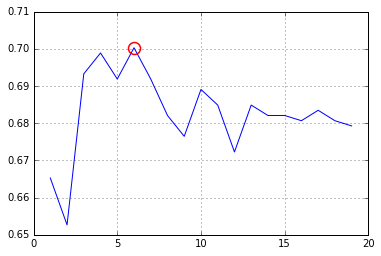

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]


# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [34]:

# Get the best estimator
best = grid.best_estimator_

cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()


# Still not as good as Logistic Regression.. 
# Let's try something else



### EXERCISE ###
''' Use Grid Search try scan over three parameters
1. max_depth:     from 1 to 20
2. criterion:     (either 'gini' or 'entropy')
3. max_features : range (1,5)

'''


" Use Grid Search try scan over three parameters\n1. max_depth:     from 1 to 20\n2. criterion:     (either 'gini' or 'entropy')\n3. max_features : range (1,5)\n\n"

### Regression

In [35]:
# Decision trees (like many other classification models)
# can also be used for regression!


drinks = pd.read_csv('../../data/drinks.csv', na_filter=False)

drinks

# Make dummy columns for each of the 6 regions
for continent_ in ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']:
    drinks[continent_] = drinks['continent'] == continent_

drinks


del drinks['continent']
del drinks['country']
del drinks['total_litres_of_pure_alcohol'] # this doesn't seem fair does it?

X = drinks.drop('wine_servings', axis=1)
y = drinks['wine_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


rtree = tree.DecisionTreeRegressor()

rtree.fit(X_train, y_train)
rtree.predict(X_test)

scores = cross_val_score(rtree, X, y, cv=10, scoring='mean_squared_error')
mse_scores = -scores
mse_scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores
rmse_scores.mean()

wine_mean = y.mean()
wine_mean

features = X.columns
pd.DataFrame(zip(features, rtree.feature_importances_)).sort_index(by=1, ascending=False)



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,0,1
0,beer_servings,0.408650
4,EU,0.342597
1,spirit_servings,0.191629
6,SA,0.030401
7,OC,0.019934
5,AF,0.006329
3,NA,0.000345
2,AS,0.000115
